In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28, 1)

In [16]:
len(test_labels)

10000

In [17]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, 
                    epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 1.7045 - accuracy: 0.7593 - val_loss: 1.6564 - val_accuracy: 0.8049
Epoch 2/10
1875/1875 [==============================] - 48s 25ms/step - loss: 1.6218 - accuracy: 0.8401 - val_loss: 1.6251 - val_accuracy: 0.8357
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6055 - accuracy: 0.8555 - val_loss: 1.6020 - val_accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.5948 - accuracy: 0.8659 - val_loss: 1.5974 - val_accuracy: 0.8627
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 1.5865 - accuracy: 0.8745 - val_loss: 1.5915 - val_accuracy: 0.8694
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 1.5786 - accuracy: 0.8820 - val_loss: 1.5878 - val_accuracy: 0.8725
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 1.5744 - accuracy: 0.8867 - val_loss: 1.5827 -

313/313 - 2s - loss: 1.5785 - accuracy: 0.8825


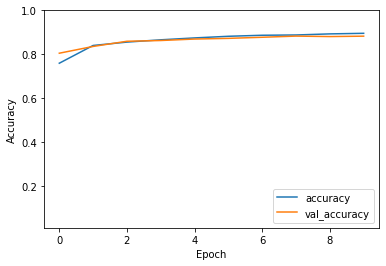

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.01, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)